In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhirensk/cats-vs-dogs-training8000test2000")

print("Path to dataset files:", path)

100%|██████████| 436M/436M [00:03<00:00, 132MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dhirensk/cats-vs-dogs-training8000test2000/versions/2


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d dhirensk/cats-vs-dogs-training8000test2000

Dataset URL: https://www.kaggle.com/datasets/dhirensk/cats-vs-dogs-training8000test2000
License(s): unknown
 89% 387M/436M [00:00<00:00, 478MB/s]
100% 436M/436M [00:00<00:00, 506MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cats-vs-dogs-training8000test2000.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [9]:
train_data=keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
validation_data=keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [10]:
#normalising pixel values between 0 and 1
def preprocessing(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_data = train_data.map(preprocessing)
validation_data = validation_data.map(preprocessing)

In [11]:
#cnn model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_data,epochs=10,validation_data=validation_data)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9871 - loss: 0.0509 - val_accuracy: 0.7165 - val_loss: 1.8001
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.9948 - loss: 0.0166 - val_accuracy: 0.7245 - val_loss: 1.9776
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.9938 - loss: 0.0192 - val_accuracy: 0.7155 - val_loss: 2.3331
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9891 - loss: 0.0473 - val_accuracy: 0.7055 - val_loss: 2.2654
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9936 - loss: 0.0181 - val_accuracy: 0.7315 - val_loss: 2.0676
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.9910 - loss: 0.0278 - val_accuracy: 0.6895 - val_loss: 2.2552
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9946 - loss: 0.0184 - val_accuracy: 0.7210 - val_loss: 2.4886
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.9916 - loss: 0.0284 - 

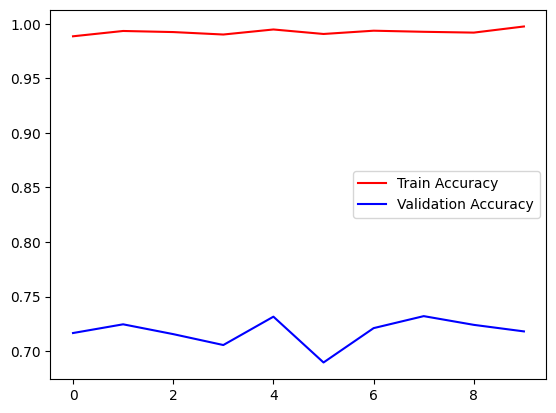

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.legend()
plt.show()


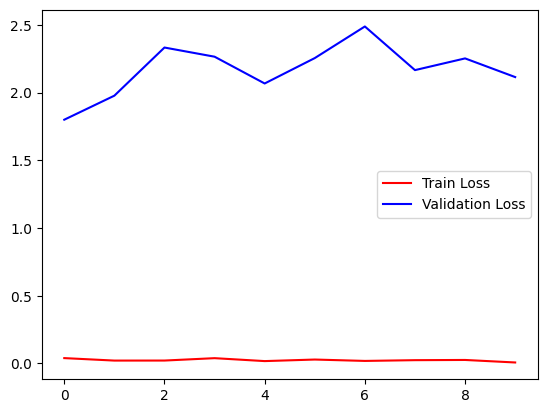

In [21]:
plt.plot(history.history['loss'], color='red', label='Train Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.legend()
plt.show()

In [23]:
!wget https://wallpaperaccess.com/full/1101027.jpg

--2025-09-17 18:39:50--  https://wallpaperaccess.com/full/1101027.jpg
Resolving wallpaperaccess.com (wallpaperaccess.com)... 172.66.163.237, 104.20.45.66, 2606:4700:10::6814:2d42, ...
Connecting to wallpaperaccess.com (wallpaperaccess.com)|172.66.163.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 301701 (295K) [image/jpeg]
Saving to: ‘1101027.jpg’

1101027.jpg         100%[===================>] 294.63K  --.-KB/s    in 0.1s    

2025-09-17 18:39:51 (2.28 MB/s) - ‘1101027.jpg’ saved [301701/301701]



In [24]:
!wget https://pixnio.com/free-images/2017/09/26/2017-09-26-07-22-55.jpg

--2025-09-17 18:40:51--  https://pixnio.com/free-images/2017/09/26/2017-09-26-07-22-55.jpg
Resolving pixnio.com (pixnio.com)... 158.106.145.163
Connecting to pixnio.com (pixnio.com)|158.106.145.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1468589 (1.4M) [image/jpeg]
Saving to: ‘2017-09-26-07-22-55.jpg’

2017-09-26-07-22-55 100%[===================>]   1.40M  3.25MB/s    in 0.4s    

2025-09-17 18:40:52 (3.25 MB/s) - ‘2017-09-26-07-22-55.jpg’ saved [1468589/1468589]



Dog is read as 1

Cat is read as 0

In [25]:
import cv2

In [26]:
test_img=cv2.imread('/content/dog.jpg')

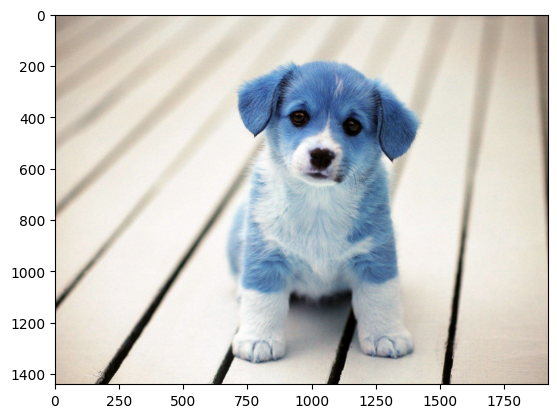

In [27]:
plt.imshow(test_img)

In [28]:
test_img.shape

(1440, 1920, 3)

In [30]:
test_img=cv2.resize(test_img,(256,256))

In [31]:
test_input=test_img.reshape((1,256,256,3))

In [32]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [34]:
test_img2=cv2.imread('/content/cat.jpg')

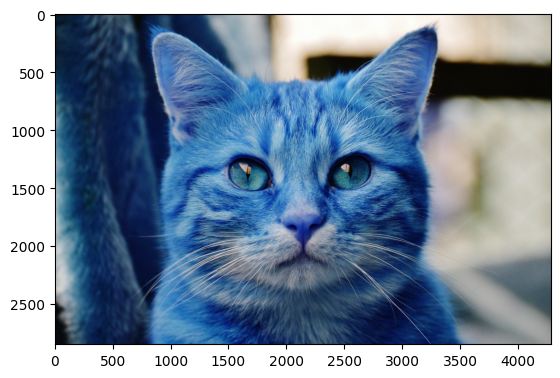

In [35]:
plt.imshow(test_img2)

In [36]:
test_img2.shape

(2850, 4286, 3)

In [37]:
test_img2=cv2.resize(test_img,(256,256))

In [38]:
test_input2=test_img2.reshape((1,256,256,3))

In [39]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.]], dtype=float32)

The classification model is accurately predicting the cat and dog images by implementing convolutional neural network